In [19]:
import pandas as pd
import numpy as np
#Data plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from sklearn
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix


#### LOADING THE DATASET

In [3]:
data = pd.read_csv('ma3route_crashes_algorithmcode.csv')
data.head(20)

,crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0,1,06/06/2018 20:39,06/06/2018,-1.263030,36.764374,1,0,0,0,0
1,2,17/08/2018 06:15,17/08/2018,-0.829710,37.037820,1,1,0,0,0
2,3,25/05/2018 17:51,25/05/2018,-1.125301,37.003297,1,0,0,0,0
3,4,25/05/2018 18:11,25/05/2018,-1.740958,37.129025,1,0,0,0,0
4,5,25/05/2018 21:59,25/05/2018,-1.259392,36.842321,1,1,0,0,0
5,6,26/05/2018 07:11,26/05/2018,-1.215499,36.835150,1,0,0,0,0
6,7,26/05/2018 07:42,26/05/2018,-1.372556,36.920491,1,1,0,0,0
7,8,26/05/2018 07:52,26/05/2018,-1.209940,36.833173,1,0,0,0,0
8,9,26/05/2018 11:51,26/05/2018,-1.314351,36.807909,1,0,0,0,0
9,10,26/05/2018 15:42,26/05/2018,-1.206788,36.854991,1,0,0,0,0


#### CLASS CREATION

In [5]:
#load the dataset
class DataUnderstanding:
    def __init__(self, data = None):
      self.df = data
    #Load Data
    def load_data(self,path):
      # Try reading with 'latin-1' encoding and specifying the delimiter as '\t'
      self.df = pd.read_csv(path, encoding='latin-1', delimiter='\t')
      return self.df
    def data_understanding(self):
      # First five rows of the dataset
      print('n\n\First five rows of the dataset')
      print('-' * 5)
      print(self.df.head())

      # Dataset Info
      print('n\n\Dataset Info')
      print('-' * 5)
      print(self.df.info())

      # Statistical Sumary of the dataset
      print('n\n\Stastical summary')
      print('-' * 5)
      print(self.df.describe())
# Total Null values per column
      print('\n\nNull values per column')
      print('-' * 5)
      print(self.df.isnull().sum())

      # Unique Values
      print("\n\nUNIQUE VALUES")
      print("-"*12)
      for col in self.df.columns:
          print(f"Column *{col}* has {self.df[col].nunique()} unique values")
          if self.df[col].nunique() < 12:
              print(f"Top unique values in the *{col}* include:")
              for idx in self.df[col].value_counts().index:
                  print(f"- {idx}")
          print("")

      # Total Duplicates in the dataset
      print('n\n\Total duplicated rows in the dataset')
      print('-'* 5)
      print(self.df.duplicated().sum())

In [6]:
data_understanding = DataUnderstanding()
df = data_understanding.load_data('ma3route_crashes_algorithmcode.csv')
data_understanding.data_understanding()

n
\First five rows of the dataset
-----
  crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0  1,06/06/2018 20:39,06/06/2018,-1.26302986,36.7...                                                                                                                     
1  2,17/08/2018 06:15,17/08/2018,-0.829710012,37....                                                                                                                     
2  3,25/05/2018 17:51,25/05/2018,-1.12530079,37.0...                                                                                                                     
3  4,25/05/2018 18:11,25/05/2018,-1.740957808,37....                                                                                                                     
4  5,25/05/2018 21:59,25/05/2018,-1.259392311,36....                                                          

#### DATA CLEANING
In this section, we perform comprehensive data cleaning including handling missing values, outliers, duplicates, and ensuring data types are consistent.

In [ ]:
#looking at the columns
df.columns

Index(['crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words'], dtype='object')

##### Handling Missing Values

In [12]:
#checking for missing values
df.isna().sum()

crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words    0
dtype: int64

Dataset has no missing values

##### Handling Duplicates

In [13]:
#checking for duplicates
df.duplicated().sum()

0

Dataset has no duplicated values

Uniformity

##### Handling Outliers

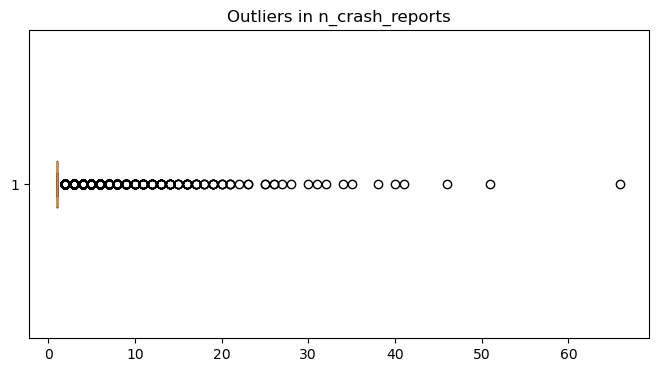

In [14]:
# Visualizing outliers in 'n_crash_reports'
plt.figure(figsize=(8, 4))
plt.boxplot(data['n_crash_reports'], vert=False)
plt.title('Outliers in n_crash_reports')
plt.show()

In [15]:
# Removing outliers using the IQR method
Q1 = data['n_crash_reports'].quantile(0.25)
Q3 = data['n_crash_reports'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (data['n_crash_reports'] >= (Q1 - 1.5 * IQR)) & \
                   (data['n_crash_reports'] <= (Q3 + 1.5 * IQR))
data = data[filter_outliers].reset_index(drop=True)

##### Correcting Data Types

In [16]:
# Converting date columns to datetime format
data['crash_date'] = pd.to_datetime(data['crash_date'], errors='coerce')
data['crash_datetime'] = pd.to_datetime(data['crash_datetime'], errors='coerce')

In [17]:
# Converting binary categorical columns to integer type
binary_columns = ['contains_fatality_words', 'contains_pedestrian_words',
                 'contains_matatu_words', 'contains_motorcycle_words']
for col in binary_columns:
    data[col] = data[col].astype(int)

##### Standardize Categorical Values


In [20]:
# Ensuring consistent labeling in categorical columns
data['contains_pedestrian_words'].replace({'yes': 1, 'no': 0}, inplace=True)

##### Handling Text and Keyword Based Columns

In [21]:
# Convert columns indicating presence of keywords (e.g., 'yes', 'no') to binary (1, 0)
text_indicators = ['contains_pedestrian_words', 'contains_matatu_words',
                  'contains_motorcycle_words']
for col in text_indicators:
    data[col] = data[col].apply(lambda x: 1 if x == 'yes' else 0)

##### Geospatial Cleaning

In [22]:
# Ensure latitude and longitude are within valid range for Kenya
valid_latitude = (data['latitude'] >= -4.7) & (data['latitude'] <= 5.0)
valid_longitude = (data['longitude'] >= 33.5) & (data['longitude'] <= 42.0)
data = data[valid_latitude & valid_longitude].reset_index(drop=True)

In [23]:
# Display cells with whitespace in specific columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Whitespace in column '{col}':")
    print(df[df[col].str.contains(r'^\s|\s$', na=False)][col])

Whitespace in column 'crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words':
Series([], Name: crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words, dtype: object)


In [24]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [ ]:
#EDA
# univariate analysis
